# Modules

In [ ]:
import csv
import numpy as np
import pandas as pd

In [ ]:
import math

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Import and mount to access drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# LDA

In [ ]:
# Now that we done with pre-processing let's start solving
# Lets create a vstack {easy visualisation}
X = np.empty((0, 3))
with open('/gdrive/MyDrive/data.csv', mode = 'r')as file:
  csvFile = csv.reader(file)
  for sample in csvFile:
        X = np.vstack((X, sample))

In [ ]:
# Converting into float
X = X.astype(float)

In [ ]:
# checking
print(X)

[[ 1.86189843  2.72296272  0.        ]
 [ 2.23589604 -2.15772062  0.        ]
 [ 1.69281688  0.99589606  0.        ]
 ...
 [ 4.46678886  3.44492577  1.        ]
 [ 5.65897988  4.04334073  1.        ]
 [ 1.98017955  7.15815205  1.        ]]


In [ ]:
# Size
print(X.shape)

(2000, 3)


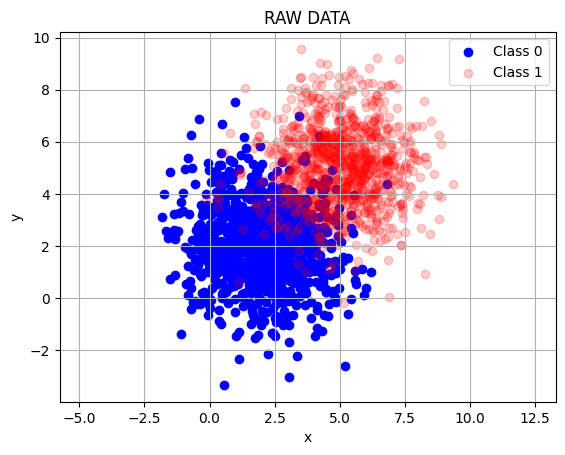

In [ ]:
# Plot the original data
X_0_0 = []
X_0_1 = []
X_1_0 = []
X_1_1 = []

for i in range(len(X_0)):
  X_0_0.append(X_0[i][0])
  X_0_1.append(X_0[i][1])
for i in range(len(X_1)):
  X_1_0.append(X_1[i][0])
  X_1_1.append(X_1[i][1])

X_0_0 = np.array(X_0_0)
X_0_1 = np.array(X_0_1)
X_1_0 = np.array(X_1_0)
X_1_1 = np.array(X_1_1)

plt.scatter(X_0_0, X_0_1, color = 'blue', label = 'Class 0')
plt.scatter(X_1_0, X_1_1, color='red', label='Class 1', alpha = 0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('RAW DATA')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## TASK 1

In [ ]:
def ComputeMeanDiff(X):
  # Creating two seperate class arrays data
  X_0 = []
  X_1 = []

  for i in X:
    if i[2] == 0.0:
      X_0.append(i)
    else:
      X_1.append(i)

  X_0 = np.array(X_0)
  X_1 = np.array(X_1)

  # Calculate class means
  mean_class_0 = np.mean(X_0, axis = 0)[:2]
  mean_class_1 = np.mean(X_1, axis = 0)[:2]

  # Difference of class wise means
  return(mean_class_0 - mean_class_1)

In [ ]:
def ComputeSW(X):
  # Creating two seperate class arrays data
  X_0 = []
  X_1 = []

  for i in X:
    if i[2] == 0.0:
      X_0.append(i)
    else:
      X_1.append(i)

  X_0 = np.array(X_0)
  X_1 = np.array(X_1)

  # Calculate class means
  mean_class_0 = np.mean(X_0, axis = 0)[:2]
  mean_class_1 = np.mean(X_1, axis = 0)[:2]

  return(np.dot((X_0[:,:2] - mean_class_0).T, (X_0[:,:2] - mean_class_0)) + \
                       np.dot((X_1[:,:2] - mean_class_1).T, (X_1[:,:2] - mean_class_1)))

In [ ]:
def ComputeSB(X):
  # Creating two seperate class arrays data
  X_0 = []
  X_1 = []

  for i in X:
    if i[2] == 0.0:
      X_0.append(i)
    else:
      X_1.append(i)

  X_0 = np.array(X_0)
  X_1 = np.array(X_1)

  # Calculate class means
  mean_class_0 = np.mean(X_0, axis = 0)[:2]
  mean_class_1 = np.mean(X_1, axis = 0)[:2]

  # Compute between-class scatter matrix
  mean_difference = mean_class_0 - mean_class_1

  return(np.outer(mean_difference, mean_difference))

In [ ]:
def GetLDAProjectionVector(X):

  scatter_within_class = ComputeSW(X)
  scatter_between_class = ComputeSB(X)

  # Compute eigenvalues and eigenvectors of the generalized eigenvalue problem
  eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(scatter_within_class).dot(scatter_between_class))

  # Sort eigenvalues and eigenvectors in descending order
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]

  return(eigenvectors[:,0])

In [ ]:
def project(x,y,w):
  return(np.dot([x, y], w))

In [ ]:
opt=int(input("Input your option (1-5): "))

match opt:
  case 1:
    meanDiff=ComputeMeanDiff(X)
    print(meanDiff)
  case 2:
    SW=ComputeSW(X)
    print(SW)
  case 3:
    SB=ComputeSB(X)
    print(SB)
  case 4:
    w=GetLDAProjectionVector(X)
    print(w)
  case 5:
    x=int(input("Input x dimension of a 2-dimensional point :"))
    y=int(input("Input y dimension of a 2-dimensional point:"))
    w=GetLDAProjectionVector(X)
    print(project(x,y,w))

Input your option (1-5): 5
Input x dimension of a 2-dimensional point :1
Input y dimension of a 2-dimensional point:1
1.4141621657823467


## TASK 2

In [ ]:
# Creating two seperate class arrays data
X_0 = []
X_1 = []

for i in X:
  if i[2] == 0.0:
    X_0.append(i)
  else:
    X_1.append(i)

X_0 = np.array(X_0)
X_1 = np.array(X_1)

# Calculate class means
mean_class_0 = np.mean(X_0, axis = 0)[:2]
mean_class_1 = np.mean(X_1, axis = 0)[:2]

In [ ]:
# Take the eigenvector corresponding to the largest eigenvalue as the projection vector
projection_vector = GetLDAProjectionVector(X)

# Project the data onto the projection vector
projected_class_0 = np.dot(X_0[:,:2], projection_vector)
projected_class_1 = np.dot(X_1[:,:2], projection_vector)

In [ ]:
# Slope of lda_1 in radiants
slope = math.atan(projection_vector[0] / projection_vector[1])

In [ ]:
# Corresponding multipliers to convert
# polar to co-ordinate system
x_co = math.cos(slope)
y_co = math.sin(slope)

In [ ]:
# For scatter within class
start_0 = np.min(projected_class_0)
end_0 = np.max(projected_class_0)
start_1 = np.min(projected_class_1)
end_1 = np.max(projected_class_1)

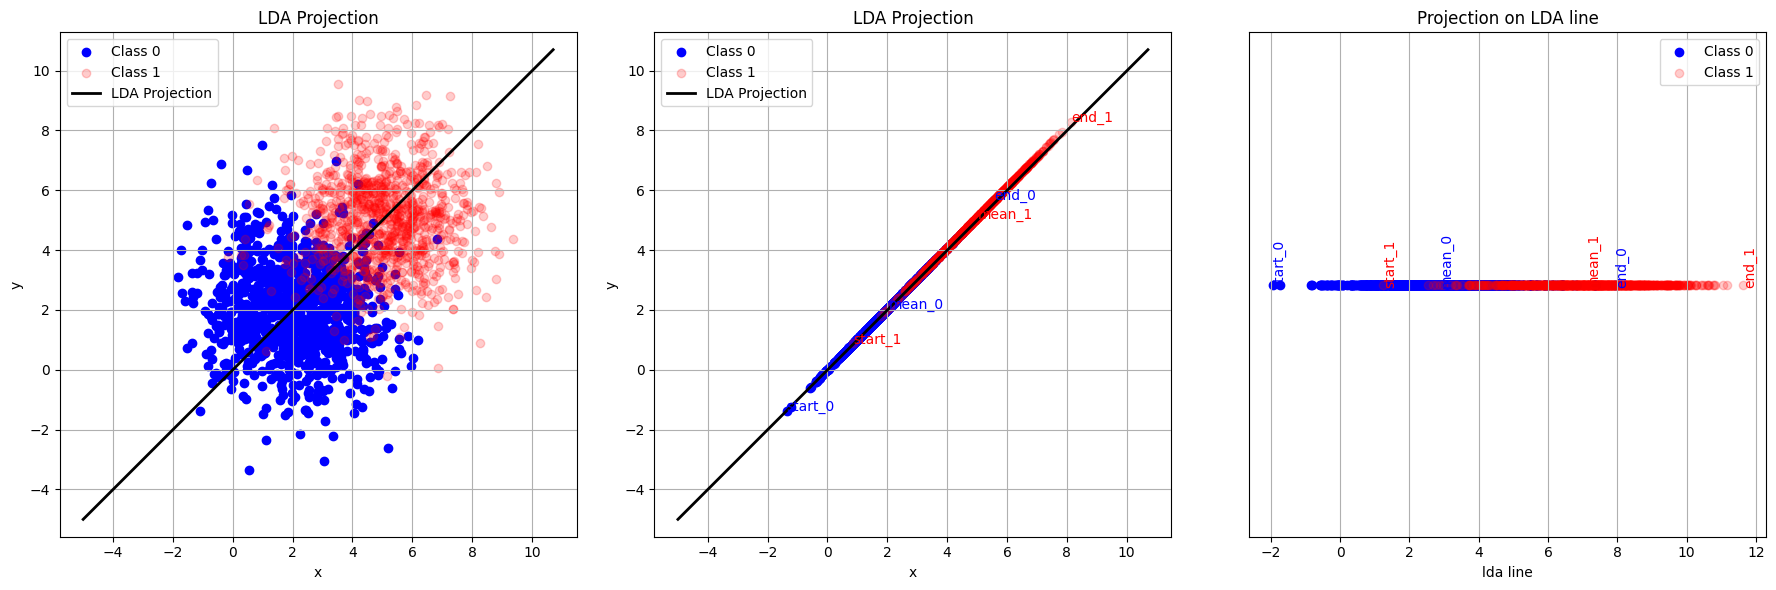

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Class 0
axs[0].scatter(X_0_0, X_0_1, color = 'blue',
              alpha = 1, label = 'Class 0')

# Class 1
axs[0].scatter(X_1_0, X_1_1, color='red',
              alpha = 0.2, label = 'Class 1')

# LDA line
axs[0].plot([-5, projection_vector[0] + 10], [-5, projection_vector[1] + 10],
            color = 'black', linewidth = 2, label = 'LDA Projection')

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('LDA Projection')
axs[0].legend()
axs[0].grid(True)
axs[0].axis('equal')


# Class 0
axs[1].scatter(projected_class_0 * x_co, projected_class_0 * y_co, color = 'blue',
              alpha = 1, label = 'Class 0')

# Class 1
axs[1].scatter(projected_class_1 * x_co, projected_class_1 * y_co, color='red',
              alpha = 0.2, label = 'Class 1')

# LDA line
axs[1].plot([-5, projection_vector[0] + 10], [-5, projection_vector[1] + 10],
            color = 'black', linewidth = 2, label = 'LDA Projection')

# Texts
axs[1].text(mean_class_0[0], mean_class_0[1], 'mean_0', color = 'blue')
axs[1].text(mean_class_1[0], mean_class_1[1], 'mean_1', color='red')
axs[1].text(start_0 * x_co, start_0 * y_co, 'start_0', color = 'blue')
axs[1].text(end_0 * x_co, end_0 * y_co, 'end_0', color = 'blue')
axs[1].text(start_1 * x_co, start_1 * y_co, 'start_1', color='red')
axs[1].text(end_1 * x_co, end_1 * y_co, 'end_1', color='red')

# plotting
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('LDA Projection')
axs[1].legend()
axs[1].grid(True)
axs[1].axis('equal')

# Class 0
axs[2].scatter(projected_class_0, np.zeros(len(projected_class_0)), color = 'blue',
              alpha = 1, label = 'Class 0')

# Class 1
axs[2].scatter(projected_class_1, np.zeros(len(projected_class_1)), color='red',
              alpha = 0.2, label = 'Class 1')

# Texts
axs[2].text(np.mean(projected_class_0), 0, 'mean_0', color = 'blue', rotation = 90)
axs[2].text(np.mean(projected_class_1), 0, 'mean_1', color='red', rotation = 90)
axs[2].text(start_0, 0, 'start_0', color = 'blue', rotation = 90)
axs[2].text(end_0, 0, 'end_0', color = 'blue', rotation = 90)
axs[2].text(start_1, 0, 'start_1', color='red', rotation = 90)
axs[2].text(end_1, 0, 'end_1', color='red', rotation = 90)

# plotting
axs[2].set_xlabel('lda line')
axs[2].set_title('Projection on LDA line')
axs[2].legend()
axs[2].grid(True)
axs[2].set_yticks([])
axs[2].axis('equal')

plt.tight_layout()
plt.show()

* We do see some overlapping between classes

## TASK 3

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], X[:,2], test_size = 0.2, random_state = 42)

In [ ]:
# Training model
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Testing and accuracy
y_pred = neigh.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8875


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       199
         1.0       0.89      0.89      0.89       201

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



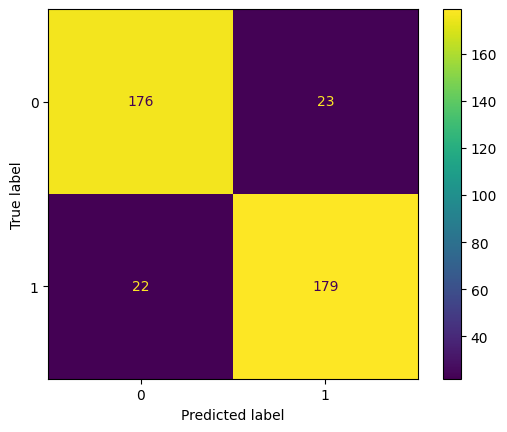

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

* Now lets test it after projecting it on LDA line

In [ ]:
X_lda = np.dot(X[:,:2], projection_vector)

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_lda, X[:,2], test_size = 0.2, random_state = 42)

In [ ]:
# Makind it 2D
X_train = np.c_[ X_train, np.zeros(len(X_train)) ]
X_test = np.c_[ X_test, np.zeros(len(X_test)) ]

In [ ]:
# Training model
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Testing and accuracy
y_pred = neigh.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.88


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       199
         1.0       0.88      0.88      0.88       201

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



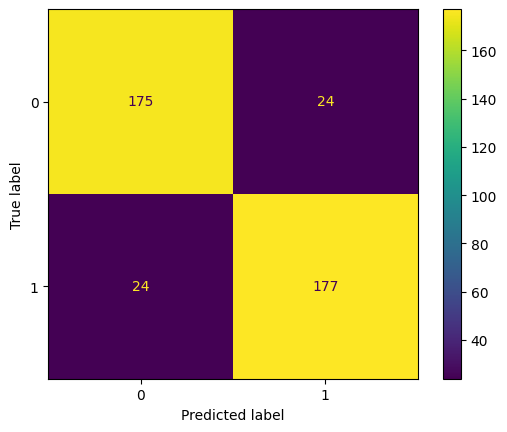

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()